# AGGREGATION & COMBINATION

In [1]:
import numpy as np
import pandas as pd

## Agregación de datos

`groupby, tabla dinámica y tabla cruzada`

In [2]:
df = pd.read_csv("../datasets/avocado_kaggle.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

In [3]:
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4535,2016-10-09,0.99,885661.32,382978.65,208869.08,10640.59,283173.0,153973.16,128733.17,466.67,conventional,2016,PhoenixTucson


In [4]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [5]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
df["year"].unique()

array([2015, 2016, 2017, 2018])

### groupby
La función GroupBy de Pandas es una función potente y versátil en Python. Nos permite dividir los datos en grupos separados para realizar cálculos que permitan un mejor análisis.
Un DataFrame se puede agrupar en sus filas (eje=0) o en sus columnas (eje=1). Una vez hecho esto, se aplica una función a cada grupo, lo que produce un nuevo valor. Finalmente, los resultados de todas esas aplicaciones de funciones se combinan en un objeto de resultado. La forma del objeto resultante generalmente dependerá de lo que se haga con los datos.

`df[subset].groupby(category).aggregation()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
# precio medio por año
# ciudades con más filas
# precio pro type

In [9]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
# averageprice en el centil 75 es 1.66
    # un 25% está por encima
    # el 75 % es igual o está por debajo

# centil: qué proporción de datos quedan por debajo de ese valor
    # el valor NO es 75; el valor es 1.66
    # El 75% de los aguacates: valen igual o menos que 1.66
    # y el 25%: vale más de 1.66


# 4 kg y está en el centil 80%
    # que pesa más que el 80% de su grupo
    # hay un 20% de bebés de su grupo que pesan más de 4kg

# centil 75% -> 

# centil 50: por debajo de el valor que corresponda con el centil 50, estará el 50% de los datos
    # y el 50% por encima

# media y mediana:
    # media: el valor medio
    # mediana: el valor que me separa el 50% de los datos -> centil 50%
    # media: sensible a outliers
    # mediana: menos sensible a los datos atípicos 

In [11]:
df.sample()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10801,2015-10-11,1.62,4268.78,325.35,1595.95,16.5,2330.98,147.0,2183.98,0.0,organic,2015,Philadelphia


In [12]:
# AGRUPO por categorías / categórico (dimensiones con x niveles)
# AGREGO por medidas / cuantitativas

df.groupby("type").agg({"AveragePrice":"mean"}).sort_values(by="AveragePrice", ascending=False).reset_index()["AveragePrice"]

0    1.653999
1    1.158040
Name: AveragePrice, dtype: float64

In [13]:
df.groupby("type").agg({"type":"count"})

,type
type,
conventional,9126
organic,9123


In [14]:
df.groupby("type").agg({"AveragePrice":"max"}).sort_values(by="AveragePrice", ascending=False)

,AveragePrice
type,
organic,3.25
conventional,2.22


In [15]:
df.groupby("type").agg({"AveragePrice":"min"}).sort_values(by="AveragePrice", ascending=False)

,AveragePrice
type,
conventional,0.46
organic,0.44


In [16]:
df.groupby("type").agg({"AveragePrice":["mean", "max", "min"]})

AveragePrice            
                     mean   max   min
type                                 
conventional     1.158040  2.22  0.46
organic          1.653999  3.25  0.44

In [17]:
df.groupby("type").agg({"AveragePrice":["mean", "max", "min"]}).reset_index()

type AveragePrice            
                        mean   max   min
0  conventional     1.158040  2.22  0.46
1       organic     1.653999  3.25  0.44

In [18]:
df.groupby("type")[["AveragePrice"]].max()

,AveragePrice
type,
conventional,2.22
organic,3.25


In [19]:
df.groupby("type")["AveragePrice"].max()

type
conventional    2.22
organic         3.25
Name: AveragePrice, dtype: float64

In [20]:
# df.groupby("type")["type"].count().reset_index().rename(columns={"type": "tipo"})

In [21]:
# .reset_index()
# .reset_index(drop=False) -> lo guardas como columns

In [22]:
df.index = df.year

In [23]:
df.reset_index(drop=True, inplace=True)

In [24]:
df.drop(2, axis=0, inplace=True)

In [25]:
#df

In [26]:
df.loc[2015] #loc & iloc ?

# L(label)oc -> EL VALOR
# I(index)loc -> LA posición

Date                 2015-03-29
AveragePrice               1.15
Total Volume          205954.04
4046                   54695.88
4225                   96405.61
4770                   11552.86
Total Bags             43299.69
Small Bags             42423.09
Large Bags                876.6
XLarge Bags                 0.0
type               conventional
year                       2015
region          RichmondNorfolk
Name: 2015, dtype: object

In [27]:
df.shape[0]

18248

In [28]:
df = pd.read_csv("../datasets/employees.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [29]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [30]:
df.shape

(1470, 35)

In [31]:
df["OverTime"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df["Attrition"].unique() #churn, kpi

array(['Yes', 'No'], dtype=object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [34]:
"""¿?
# describe -> numéricos
# string -> value_counts()

nulos, duplicados, escalas, categorías de las cateogrías

- Relación entre variables
    - Empleados:
        - YearsSinceLastPromotion & YearsAtCompany
        - YearsAtCompany & TotalWorkingYears
        - Education field & daily rate
        - Education field & department
"""

'¿?\n# describe -> numéricos\n# string -> value_counts()\n\nnulos, duplicados, escalas, categorías de las cateogrías\n\n- Relación entre variables\n    - Empleados:\n        - YearsSinceLastPromotion & YearsAtCompany\n        - YearsAtCompany & TotalWorkingYears\n        - Education field & daily rate\n        - Education field & department\n'

In [35]:
# YearsSinceLastPromotion, YearsAtCompany

df[["YearsSinceLastPromotion", "YearsAtCompany"]].sort_values(by="YearsAtCompany", ascending=False).head(10)

,YearsSinceLastPromotion,YearsAtCompany
126,15,40
98,1,37
1116,2,36
270,4,36
561,1,34
237,15,33
962,0,33
190,11,33
914,15,33
1111,1,33


In [36]:
pd.set_option('display.max_columns', None) 

print(df["YearsAtCompany"].mean())
print(df["YearsSinceLastPromotion"].mean())
df["diferencia"] = (df["YearsSinceLastPromotion"] - df["YearsAtCompany"]).abs()

df["diferencia"].mean() # 4.82
df["diferencia"].median() # 4 

# Mediana vs. media
    # Me ayuda a interpretar la media con más contexto
    # La mediana: es una medida de tendencia central: es menos sensible a los valores atípicos

7.0081632653061225
2.1877551020408164


np.float64(4.0)

In [37]:
df["Education"].value_counts(
    
)

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [38]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'diferencia'],
      dtype='object')

In [39]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,diferencia
215,41,No,Travel_Rarely,896,Sales,6,3,Life Sciences,1,298,4,Female,75,3,3,Manager,4,Single,13591,14674,3,Y,Yes,18,3,3,80,0,16,3,3,1,0,0,0,1
1161,38,No,Travel_Rarely,397,Research & Development,2,2,Medical,1,1638,4,Female,54,2,3,Manufacturing Director,3,Married,7756,14199,3,Y,Yes,19,3,4,80,1,10,6,4,5,4,0,2,5
219,54,No,Travel_Rarely,1147,Sales,3,3,Marketing,1,303,4,Female,52,3,2,Sales Executive,1,Married,5940,17011,2,Y,No,14,3,4,80,1,16,4,3,6,2,0,5,6
338,30,No,Travel_Rarely,570,Sales,5,3,Marketing,1,456,4,Female,30,2,2,Sales Executive,3,Divorced,6118,5431,1,Y,No,13,3,3,80,3,10,2,3,10,9,1,2,9
879,60,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9,10
193,43,No,Non-Travel,1344,Research & Development,7,3,Medical,1,262,4,Male,37,4,1,Research Scientist,4,Divorced,2089,5228,4,Y,No,14,3,4,80,3,7,3,4,5,4,2,2,3
283,55,No,Travel_Rarely,147,Research & Development,20,2,Technical Degree,1,389,2,Male,37,3,2,Laboratory Technician,4,Married,5415,15972,3,Y,Yes,19,3,4,80,1,12,4,3,10,7,0,8,10
529,38,No,Travel_Rarely,827,Research & Development,1,4,Life Sciences,1,724,2,Female,33,4,2,Healthcare Representative,4,Single,7625,19383,0,Y,No,13,3,3,80,0,10,4,2,9,7,1,8,8
518,38,No,Travel_Rarely,243,Sales,7,4,Marketing,1,709,4,Female,46,2,2,Sales Executive,4,Single,4028,7791,0,Y,No,20,4,1,80,0,8,2,3,7,7,0,5,7
247,34,No,Travel_Rarely,470,Research & Development,2,4,Life Sciences,1,339,4,Male,84,2,2,Manufacturing Director,1,Married,5957,23687,6,Y,No,13,3,2,80,1,13,3,3,11,9,5,9,6


In [40]:
df["Department"].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [41]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
t = newdf.corr()
t[t > 0.5]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,diferencia
Age,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.509604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourlyRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobInvolvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,0.509604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.950300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.782208,NaN,NaN,0.534739,NaN,NaN,NaN,NaN


In [42]:
df.sample(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,diferencia
89,46,Yes,Travel_Rarely,669,Sales,9,2,Medical,1,118,3,Male,64,2,3,Sales Executive,4,Single,9619,13596,1,Y,No,16,3,4,80,0,9,3,3,9,8,4,7,5
385,30,Yes,Travel_Frequently,464,Research & Development,4,3,Technical Degree,1,514,3,Male,40,3,1,Research Scientist,4,Single,2285,3427,9,Y,Yes,23,4,3,80,0,3,4,3,1,0,0,0,1
1132,40,No,Travel_Rarely,118,Sales,14,2,Life Sciences,1,1598,4,Female,84,3,2,Sales Executive,1,Married,4639,11262,1,Y,No,15,3,3,80,1,5,2,3,5,4,1,2,4
499,33,No,Travel_Rarely,1216,Sales,8,4,Marketing,1,677,3,Male,39,3,2,Sales Executive,3,Divorced,7104,20431,0,Y,No,12,3,4,80,0,6,3,3,5,0,1,2,4
282,29,No,Travel_Frequently,442,Sales,2,2,Life Sciences,1,388,2,Male,44,3,2,Sales Executive,4,Single,4554,20260,1,Y,No,18,3,1,80,0,10,3,2,10,7,0,9,10
1259,30,No,Travel_Rarely,305,Research & Development,16,3,Life Sciences,1,1763,3,Male,58,4,2,Healthcare Representative,3,Married,5294,9128,3,Y,No,16,3,3,80,1,10,3,3,7,0,1,7,6
519,29,No,Travel_Frequently,806,Research & Development,1,4,Life Sciences,1,710,2,Male,76,1,1,Research Scientist,4,Divorced,2720,18959,1,Y,No,18,3,4,80,1,10,5,3,10,7,2,8,8
784,38,No,Travel_Rarely,330,Research & Development,17,1,Life Sciences,1,1088,3,Female,65,2,3,Healthcare Representative,3,Married,8823,24608,0,Y,No,18,3,1,80,1,20,4,2,19,9,1,9,18
48,46,No,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,1,Male,98,3,2,Sales Executive,4,Single,5772,20445,4,Y,Yes,21,4,3,80,0,14,4,3,9,6,0,8,9
1083,40,Yes,Travel_Rarely,676,Research & Development,9,4,Life Sciences,1,1534,4,Male,86,3,1,Laboratory Technician,1,Single,2018,21831,3,Y,No,14,3,2,80,0,15,3,1,5,4,1,0,4


In [43]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'diferencia'],
      dtype='object')

`agrupar por departamentos y su edad media`

In [44]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,diferencia
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,6
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,9
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,5
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,6
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,6
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,9


`agrupar por departamentos y su edad máxima`

In [74]:
df.groupby("Department").agg({"Age":"max"})

,Age
Department,
Human Resources,59
Research & Development,60
Sales,60


`agrupar por departamentos y su edad mínima`

In [75]:
df.groupby("Department").agg({"Age":"min"})

,Age
Department,
Human Resources,19
Research & Development,18
Sales,18


`groupby: 2+`: Diferentes campos educativos y sus salarios medios en cada uno de los departamentos

In [76]:
df.groupby(["Department", "EducationField"]).agg({"MonthlyIncome":"mean"})

MonthlyIncome
Department             EducationField                 
Human Resources        Human Resources     7241.148148
                       Life Sciences       6914.062500
                       Medical             6594.076923
                       Other               5016.666667
                       Technical Degree    3081.250000
Research & Development Life Sciences       6179.984091
                       Medical             6539.223140
                       Other               6278.687500
                       Technical Degree    5760.819149
Sales                  Life Sciences       7246.233333
                       Marketing           7348.584906
                       Medical             6377.227273
                       Other               5398.733333
                       Technical Degree    6066.294118

In [77]:
df.groupby(["EducationField", "Department"]).agg({"MonthlyIncome":"mean"})

MonthlyIncome
EducationField   Department                           
Human Resources  Human Resources           7241.148148
Life Sciences    Human Resources           6914.062500
                 Research & Development    6179.984091
                 Sales                     7246.233333
Marketing        Sales                     7348.584906
Medical          Human Resources           6594.076923
                 Research & Development    6539.223140
                 Sales                     6377.227273
Other            Human Resources           5016.666667
                 Research & Development    6278.687500
                 Sales                     5398.733333
Technical Degree Human Resources           3081.250000
                 Research & Development    5760.819149
                 Sales                     6066.294118

In [45]:
# multiindex: https://pandas.pydata.org/docs/user_guide/advanced.html

`más campos`

In [79]:
df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,diferencia
1045,40,No,Travel_Rarely,896,Research & Development,2,3,Medical,1,1474,3,Male,68,3,1,Research Scientist,3,Divorced,2345,8045,2,Y,No,14,3,3,80,1,8,3,4,3,1,1,2,2


In [82]:
df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,diferencia
1280,37,No,Travel_Rarely,1239,Human Resources,8,2,Other,1,1794,3,Male,89,3,2,Human Resources,2,Divorced,4071,12832,2,Y,No,13,3,3,80,0,19,4,2,10,0,4,7,6


In [84]:
df.groupby(["Education", "EducationField", "Department"]).agg({"MonthlyIncome":["mean", "min", "max"]})

MonthlyIncome             
                                                           mean   min    max
Education EducationField   Department                                       
1         Human Resources  Human Resources          2720.500000  1555   3886
          Life Sciences    Human Resources          2942.000000  2942   2942
                           Research & Development   6392.000000  2011  19973
                           Sales                    5409.187500  1118  10325
          Marketing        Sales                    7541.357143  1675  19845
...                                                         ...   ...    ...
5         Medical          Human Resources          6272.000000  6272   6272
                           Research & Development   9459.615385  2127  17426
                           Sales                    6653.000000  6653   6653
          Other            Research & Development   3983.000000  3983   3983
          Technical Degree Research & Development   5677.333333  2546  10169

[63 rows x 3 columns]

#### agrupar y agregar

Otra forma de agrupar con sintaxis agg
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html

- media
- suma
- recuento

Supongamos que queremos calcular la media de la columna data1 utilizando las etiquetas de key1. Hay varias formas de hacerlo. Una es acceder a data1 y llamar a groupby con la columna (una String) en key1.
Los datos (una Serie) se han agregado en función de la clave de grupo, lo que produce una nueva String que ahora está indexada por los valores únicos de la columna key1. El índice resultante tiene el nombre 'key1' porque la columna DataFrame `df['key1']` lo tenía.

### Tablas dinámicas

[Comparación entre tabla dinámica y tabla agrupada](https://towardsdatascience.com/una-comparacion-entre-tabla-agrupada-y-tabla-dinámica-en-pythons-pandas-module-527909e78d6b?source=userActivityShare-4c6d9a33c6-1674605913&_branch_match_id=1146490620103499300&_branch_referrer=H4sIAAAAAAAAA8soKSkottLXz8nMy9bLTU3JLM3VS87P1TfKCvCtKvOvCCpPAgAN4ht%2FIwAAAA%3D%3D)

```pivot_table(df, valores=Ninguno, índice=Ninguno, columnas=Ninguno, aggfunc='media', ...)```

* Podemos crear una tabla dinámica de estilo hoja de cálculo como un DataFrame. Los niveles de la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del DataFrame resultante.

In [87]:
df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,diferencia
173,30,No,Non-Travel,111,Research & Development,9,3,Medical,1,239,3,Male,66,3,2,Laboratory Technician,1,Divorced,3072,11012,1,Y,No,11,3,3,80,2,12,4,3,12,9,6,10,6


In [88]:
df.pivot_table(values="Age", index = "Department", columns = None, aggfunc="mean")

,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601


In [89]:
pd.pivot_table(df, values="Age", index = "Department", columns = None, aggfunc="mean")

,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601


Tabla dinámica: el departamento y sus edades medias

Tabla dinámica: el departamento y sus edades máximas

In [90]:
pd.pivot_table(df, values="Age", index = "Department", columns = None, aggfunc="max")

,Age
Department,
Human Resources,59
Research & Development,60
Sales,60


`tabla dinámica`: el departamento y sus edades mínimas

In [91]:
pd.pivot_table(df, values="Age", index = "Department", columns = None, aggfunc="min")

,Age
Department,
Human Resources,19
Research & Development,18
Sales,18


Tabla dinámica: el departamento y su edad media

Tabla dinámica de múltiples índices: Departamento y campo de educación y verificación de los valores salariales máximos de los empleados

In [93]:
pd.pivot_table(df, values="MonthlyIncome", index = ["Department", "EducationField"], columns = None, aggfunc="max")

MonthlyIncome
Department             EducationField                 
Human Resources        Human Resources           19636
                       Life Sciences             19717
                       Medical                   18200
                       Other                      7988
                       Technical Degree           4323
Research & Development Life Sciences             19999
                       Medical                   19859
                       Other                     19613
                       Technical Degree          19943
Sales                  Life Sciences             19847
                       Marketing                 19845
                       Medical                   19833
                       Other                     10932
                       Technical Degree          16872

In [103]:
pd.pivot_table(df, values="MonthlyIncome", index = ["Department", "EducationField"], aggfunc="max")
pd.pivot_table(df, values="MonthlyIncome", columns = ["Department", "EducationField"], aggfunc="max")

Department     Human Resources                                               \
EducationField Human Resources Life Sciences Medical Other Technical Degree   
MonthlyIncome            19636         19717   18200  7988             4323   

Department     Research & Development                                  \
EducationField          Life Sciences Medical  Other Technical Degree   
MonthlyIncome                   19999   19859  19613            19943   

Department             Sales                                            
EducationField Life Sciences Marketing Medical  Other Technical Degree  
MonthlyIncome          19847     19845   19833  10932            16872

In [ ]:
df.groupby( ["Department", "EducationField"]).agg({"MonthlyIncome":"max"})

MonthlyIncome
Department             EducationField                 
Human Resources        Human Resources           19636
                       Life Sciences             19717
                       Medical                   18200
                       Other                      7988
                       Technical Degree           4323
Research & Development Life Sciences             19999
                       Medical                   19859
                       Other                     19613
                       Technical Degree          19943
Sales                  Life Sciences             19847
                       Marketing                 19845
                       Medical                   19833
                       Other                     10932
                       Technical Degree          16872

In [98]:
pd.pivot_table(df, values="MonthlyIncome", columns = ["Department", "EducationField"], aggfunc="max").shape

(1, 14)

In [99]:
cols = ["Department", "EducationField"]
pd.pivot_table(df, values="MonthlyIncome",index = cols, aggfunc="max").shape

(14, 1)

### Diferencias entre la tabla dinámica y la función groupby

In [108]:
df.groupby(['Department','EducationField']).agg({'Age':'mean'})

Age
Department             EducationField             
Human Resources        Human Resources   37.037037
                       Life Sciences     39.375000
                       Medical           39.846154
                       Other             34.666667
                       Technical Degree  32.500000
Research & Development Life Sciences     36.997727
                       Medical           37.242424
                       Other             36.187500
                       Technical Degree  37.063830
Sales                  Life Sciences     37.186667
                       Marketing         37.924528
                       Medical           34.727273
                       Other             32.000000
                       Technical Degree  33.941176

<Axes: xlabel='Department'>

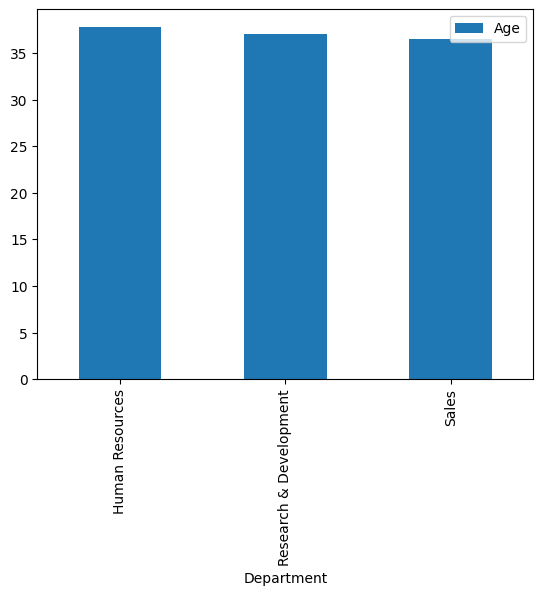

In [110]:
df.groupby(['Department']).agg({'Age':'mean'}).plot(kind='bar')

<Axes: >

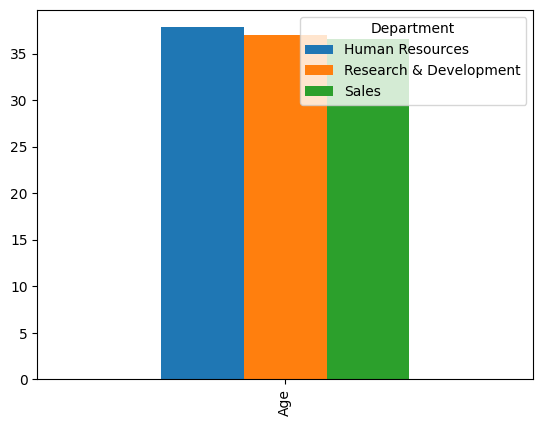

In [113]:
pd.pivot_table(df, values='Age', index='Department', aggfunc = 'mean').T.plot(kind="bar")

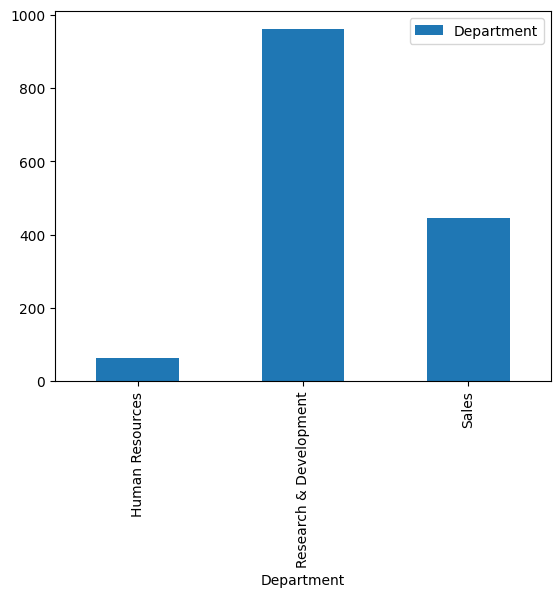

In [117]:
df.groupby("Department").agg({"Department":"count"}).plot(kind="bar");

In [114]:
pd.pivot_table(df, index='Department', aggfunc = 'count')

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,diferencia
Department,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
Research & Development,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961
Sales,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446


In [105]:
pd.pivot_table(df, values='Age', index='Department', columns='EducationField', aggfunc = 'mean')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,37.037037,39.375000,NaN,39.846154,34.666667,32.500000
Research & Development,NaN,36.997727,NaN,37.242424,36.187500,37.063830
Sales,NaN,37.186667,37.924528,34.727273,32.000000,33.941176


`groupby`: edad media del equipo por abreviatura del equipo y temporada.

`pivot_table`: edad media del equipo por abreviatura del equipo y temporada.

### Crosstab

* Calcular una tabulación cruzada simple de dos (o más) factores. De manera predeterminada, calcula una tabla de frecuencias de los factores a menos que se pase una matriz de valores y una función de agregación. Generalmente se utiliza para ver la frecuencia de dos variables cualitativas: cuántas veces el valor de una columna aparece en la otra.

```pd.crosstab(df[columna1], df[columna2])```

In [118]:
pd.crosstab(df["Department"], df["EducationField"])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,27,16,0,13,3,4
Research & Development,0,440,0,363,64,94
Sales,0,150,159,88,15,34


In [ ]:
pd.crosstab(columns=df["Department"], index=df["EducationField"], values = df["MonthlyIncome"], aggfunc="mean") # con los nans

Department,Human Resources,Research & Development,Sales
EducationField,,,
Human Resources,7241.148148,NaN,NaN
Life Sciences,6914.062500,6179.984091,7246.233333
Marketing,NaN,NaN,7348.584906
Medical,6594.076923,6539.223140,6377.227273
Other,5016.666667,6278.687500,5398.733333
Technical Degree,3081.250000,5760.819149,6066.294118


In [125]:
pd.crosstab(df["Department"],  df["EducationField"])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,27,16,0,13,3,4
Research & Development,0,440,0,363,64,94
Sales,0,150,159,88,15,34


-------------------------------------------------- -------------------------------------------------- -------------------------------------------------- -------------------------------------------------- ----

In [ ]:
# pivot (te muestra los valores nulos)
# groupby


# crosstab: por defecto hacvec el count


# agregaciones según categorías
# tablas dinámicas/resumen

## Hands-on

In [ ]:
df = pd.read_csv("../datasets/business.csv")
df

,Customer_ID!!,Purchase_Date###,Product category,Amount_Paid_($)@@,Discount applied@@,COUNTRY!!,City###,CUSTOMER REVIEW
0,100a,21-09-2023,Electronics,NaN,True,Germany,Toronto,Excellent product!
1,NaN,NaN,NaN,NaN,True,Spain,Rome,Customer service was awful.
2,NaN,2023/06/18,Clothing,NaN,True,Mexico,Paris,Worst purchase ever.
3,103a,26-11-2023,Home,$200,Yes,Germany,Los Angeles,Customer service was awful.
4,104a,2023/11/16,Clothing,NaN,False,USA,Toronto,Customer service was awful.
...,...,...,...,...,...,...,...,...
995,NaN,20-05-2023,Clothing,NaN,Yes,Canada,Berlin,"Meh, it's okay."
996,596,19-03-2023,NaN,NaN,False,USA,Madrid,Worst purchase ever.
997,597a,2023/09/17,Home,$278,Yes,Mexico,NaN,Totally worth it!
998,598a,2023/03/05,NaN,108$,True,Germany,New York,"Arrived late, but good quality."


In [127]:
#!pip install janitor

In [128]:
import time
def countdown (minutos, tarea):
    print(f"Estamos con: {tarea}")
    total = int(minutos * 60)
    for s in range(total, 0, -1):
        if s % 60 == 0:
            print (f"Quedan {s // 60} min")
        elif s == 30:
            print("30 seccsssssss")
        time.sleep(1)
    print("TIEMPOOOOOO")

countdown (10, "business.csv")

Estamos con: business.csv
Quedan 10 min
Quedan 9 min
Quedan 8 min
Quedan 7 min
Quedan 6 min
Quedan 5 min
Quedan 4 min
Quedan 3 min
Quedan 2 min
Quedan 1 min
30 seccsssssss
TIEMPOOOOOO


#### Import `business.csv` and respond to to following questions:
##### Revenue & Sales Analysis
	1.	Which country has generated the highest total sales?
	2.	Which city has the highest average purchase amount?
	3.	What is the total revenue for each product category?
	4.	Which country has the most transactions with negative amounts?
	5.	How many purchases were made without a discount, and how much revenue did they generate?
##### Customer Insights
	6.	Who is the top-spending customer overall?
	7.	Which customer has spent the most in the “Electronics” category?
	8.	How many customers have made repeat purchases?
	9.	Which customer has received the most discounts?
##### Review Sentiment & Correlations
	10.	Are negative reviews correlated with low purchase amounts?
	11.	Which country has the most positive vs. negative reviews?
	12.	Do customers who received discounts leave better reviews?
	13.	Are refunds (negative amounts) more common among customers who left bad reviews?

In [139]:
"""	1.	Which country has generated the highest total sales?
	2.	Which city has the highest average purchase amount?
	3.	What is the total revenue for each product category?
	4.	Which country has the most transactions with negative amounts?
	5.	How many purchases were made without a discount, and how much revenue did they generate?
"""
df.sample()

,customer_id,purchase_date,product_category,amount_paid_,discount_applied,country,city,customer_review_
113,NaN,2023/03/07,Clothing,NaN,NaN,Germany,Berlin,"Meh, it's okay."


In [ ]:
def clean (df):
    """
    # 1. nombre columnas
    # 2. amount paid
    # 5. discount_applied:True/False o Yes/No?

    # 4. customer_id: vienen con letras
    # 3. formato fechas
    # 6. 
    """
    df = pd.read_csv("../datasets/business.csv")

    # 1. Nombre columnas
    df.columns = [i.lower() for i in df.columns]
    df.columns = [i.replace("!", "").replace("#", "").replace("(", "").replace(")", "").replace("$", "").replace("@", "") for i in df.columns]
    df.columns = [i.replace("_", " ").strip().replace(" ", "_") for i in df.columns]

    # 2. Amount paid
    df['amount_paid'] = df['amount_paid'].astype(str).str.replace('$', '', regex=False)
    df['amount_paid'] = df['amount_paid'].str.strip()
    df['amount_paid'] = pd.to_numeric(df['amount_paid'], errors='coerce')
    df['amount_paid'].unique()

    # 3. Descuento
    df["discount_applied"] = df["discount_applied"].apply(lambda x: True if str(x).strip().lower() == 'yes' else "Unknown" if str(x).strip().lower() == "unknown" else False)

    df.sample()
    return df

In [ ]:
# QA: regex

    # []: [a-z0-9!]: rangos
    # [a-]: te busca que en tu string existan todas estas opciones
    # (): grupo: buscar que exista un match exacto

In [ ]:
df = pd.read_csv("../datasets/business.csv")
df = pd.read_csv("../datasets/business.csv")

# 1. Nombre columnas
df.columns = [i.lower() for i in df.columns]
df.columns = [i.replace("!", "").replace("#", "").replace("(", "").replace(")", "").replace("$", "").replace("@", "") for i in df.columns]
df.columns = [i.replace("_", " ").strip().replace(" ", "_") for i in df.columns]

# 2. Amount paid
df['amount_paid'] = df['amount_paid'].astype(str).str.replace('$', '', regex=False)
df['amount_paid'] = df['amount_paid'].str.strip()
df['amount_paid'] = pd.to_numeric(df['amount_paid'], errors='coerce')
df['amount_paid'].unique()

# 3. Descuento
df["discount_applied"] = df["discount_applied"].apply(lambda x: True if str(x).strip().lower() == 'yes' else "Unknown" if str(x).strip().lower() == "unknown" else False)

df.sample()

,customer_id,purchase_date,product_category,amount_paid,discount_applied,country,city,customer_review
761,NaN,2023-11-28,Home,NaN,Yes,Canada,NaN,"Defective item, had to return."


In [168]:
df["discount_applied"].value_counts()

discount_applied
False      296
No         166
True       152
Yes        138
Unknown    131
Name: count, dtype: int64

In [169]:
df[df["discount_applied"] == "Unknown"]

,customer_id,purchase_date,product_category,amount_paid,discount_applied,country,city,customer_review
8,108,06-10-2023,Electronics,199.0,Unknown,Italy,NaN,Totally worth it!
9,NaN,2023-03-03,NaN,NaN,Unknown,Italy,London,NaN
23,123a,04-11-2023,NaN,NaN,Unknown,Mexico,NaN,"Meh, it's okay."
37,137a,2023-11-15,Home,-52.0,Unknown,USA,Berlin,"Arrived late, but good quality."
48,148a,2023-06-06,Clothing,226.0,Unknown,Italy,Toronto,Amazing!
...,...,...,...,...,...,...,...,...
970,570,2023-03-26,NaN,NaN,Unknown,Germany,Madrid,Would buy again!
974,574a,15-12-2023,NaN,64.0,Unknown,Canada,NaN,"Arrived late, but good quality."
980,580a,02-01-2023,Clothing,NaN,Unknown,Germany,New York,Totally worth it!
983,583,2023-08-08,Electronics,131.0,Unknown,Spain,Toronto,Worst purchase ever.


In [176]:
df["discount_applied"].value_counts()

df["discount_applied"] = df["discount_applied"].apply(lambda x: True if str(x).strip().lower() == 'yes' else "Unknown" if str(x).strip().lower() == "unknown" else False)
df["discount_applied"].value_counts()

discount_applied
False      731
True       138
Unknown    131
Name: count, dtype: int64

In [ ]:
# yes
# Yes
# Yes 


In [ ]:
"""
¿Qué hacemos con los datos que no están completos / calidad es mala?
- Depende -> objetivo
- España / Roma -> quitarla
- España / Cáceres -> el resto son nulos -> ¿lo quito? 
"""

In [145]:
df.groupby("country").agg({"amount_paid":"count"}).sort_values(by="amount_paid", ascending=False)

,amount_paid
country,
Canada,88
Germany,83
Mexico,83
Italy,81
France,78
UK,76
USA,67
Spain,52


## Combinación de datos: mezcla de Dataframes

- https://realpython.com/pandas-merge-join-and-concat/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Concatenación: dos cosas juntas
Unimos los dataframes a lo largo del eje 0, uno debajo del otro. Alineamos las columnas por etiqueta.

#### Concatenación en el eje 0 (filas)

#### Concatenación en el eje 1 (columnas)

![Uniones SQL](https://upload.wikimedia.org/wikipedia/commons/9/9d/SQL_Joins.svg)

### MERGE: columnas relacionadas

[Merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) es más útil cuando desea fusionar filas que comparten datos.

In [46]:
from IPython.display import display_html 

In [47]:
df1 = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


df2 = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

df3 = pd.DataFrame(
    {
        "key1": ["K90", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K5", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "Y": ["D0", "D70", "D2", "D5"],
    }
)

In [48]:
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(), raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [49]:
# merge, default is inner

result = pd.merge(df1, df2)
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### LEFT MERGE

In [50]:
left_merge = pd.merge(df1, df2, how="left")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
left_merge = left_merge.style.set_table_attributes("style='display:inline'").set_caption("left_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [51]:
display_html(left_merge._repr_html_(), raw=True)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,nan,nan
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,nan,nan


#### RIGHT MERGE

In [52]:
right_merge = pd.merge(df1, df2, how="right")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
right_merge = right_merge.style.set_table_attributes("style='display:inline'").set_caption("right_merge")

display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(),raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [53]:
display_html(right_merge._repr_html_(), raw=True)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,nan,nan,C3,D3


#### Fusión INTERNA

In [54]:
inner_merge = pd.merge(df1, df2, how="inner")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
inner_merge = inner_merge.style.set_table_attributes("style='display:inline'").set_caption("inner_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [55]:
display_html(inner_merge._repr_html_(), raw=True)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### OUTER MERGE

In [56]:
outer_merge = pd.merge(df1, df2, how="outer")

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
outer_merge = outer_merge.style.set_table_attributes("style='display:inline'").set_caption("outer_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [57]:
display_html(outer_merge._repr_html_(), raw=True)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,nan,nan
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,nan,nan,C3,D3
5,K2,K1,A3,B3,nan,nan


### JOIN & CONCAT on different columns

In [58]:
df1_docs = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2_docs = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [59]:
df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


#### Concatenación en dos columnas diferentes

In [60]:
concat_docs = pd.concat([df1_docs, df2_docs], axis=1, keys=["1st table", "2nd table"])

df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')
merge_styler = concat_docs.style.set_table_attributes("style='display:inline'").set_caption('concat_docs')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [61]:
display_html(merge_styler._repr_html_(), raw=True)

concat_docs 
 
 
   
 1st table 
 2nd table 
 
 
   
 lkey 
 value 
 rkey 
 value 
 
 
 
 
 0 
 foo 
 1 
 foo 
 5 
 
 
 1 
 bar 
 2 
 bar 
 6 
 
 
 2 
 baz 
 3 
 baz 
 7 
 
 
 3 
 foo 
 5 
 foo 
 8

#### Merge en dos columnas diferentes

In [62]:
df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [63]:
merge_docs = df1_docs.merge(df2_docs, left_on='lkey', right_on='rkey', suffixes = ["_fromleft", "_fromright"])

In [64]:
merge_docs = df1_docs.merge(df2_docs, left_on='lkey', right_on='rkey', suffixes = ["_from_left", "_from_right"])


df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')
merge_styler = merge_docs.style.set_table_attributes("style='display:inline'").set_caption('merge_docs')

display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(), raw=True)

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5
,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [65]:
display_html(merge_styler._repr_html_(), raw=True)

,lkey,value_from_left,rkey,value_from_right
0,foo,1,foo,5
1,foo,1,foo,8
2,bar,2,bar,6
3,baz,3,baz,7
4,foo,5,foo,5
5,foo,5,foo,8


In [66]:
# suffixes: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [67]:
# concat: putting things together
# join/merge: putting things together THAT ARE RELATED
    # related info in the same place -> reduces redundancy

### Join: índice relacionado
El join, a diferencia del merge, unirá los dataframes y donde no haya registros en el "índice" pondrá NaN

In [68]:
import numpy as np
import pandas as pd   
from IPython.display import display_html 

In [69]:
left_df = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right_df = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

In [70]:
df1_styler = left_df.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = right_df.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_()+ df2_styler._repr_html_(), raw=True)

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2
,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [71]:
result = left_df.join(right_df, how="inner")

#Rendering the df's in the same line. No need to learn this code

df1_styler = left_df.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = right_df.style.set_table_attributes("style='display:inline'").set_caption('Right table')
df1_df2_merged = result.style.set_table_attributes("style='display:inline'").set_caption('JOIN')

display_html(df1_styler._repr_html_()+ df2_styler._repr_html_() + df1_df2_merged._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+ df2_styler._repr_html_(), raw=True)

Left table 
 
 
   
 A 
 B 
 
 
 
 
 K0 
 A0 
 B0 
 
 
 K1 
 A1 
 B1 
 
 
 K2 
 A2 
 B2 
 
 
 

 
 Right table 
 
 
   
 C 
 D 
 
 
 
 
 K0 
 C0 
 D0 
 
 
 K2 
 C2 
 D2 
 
 
 K3 
 C3 
 D3 
 
 
 

 
 JOIN 
 
 
   
 A 
 B 
 C 
 D 
 
 
 
 
 K0 
 A0 
 B0 
 C0 
 D0 
 
 
 K2 
 A2 
 B2 
 C2 
 D2

<figure class="wp-block-table is-style-stripes"><table class="has-fixed-layout"><thead><tr><th><strong>Función de unión</strong></th><th class="has-text-align-center" data-align="center"><strong>join()</strong></th><th class="has-text-align-center" data-align="center"><strong>merge()</strong></th></tr></thead><tbody><tr><td>interior</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>izquierda</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>derecha</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>exterior</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>cruz</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>Unión en índices</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>Unirse en columnas</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>A la izquierda en la columna, a la derecha en el índice</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>A la izquierda en el índice, a la derecha en la columna</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr></tbody></table>

## Métodos habituales de Pandas
```python
df.head() # imprime la cabecera, por defecto 5 filas
df.tail() # establece la cola, por defecto 5 filas
df.describe() # descripción estadística
df.info() # información del df
df.columns # muestra la columna
df.index # muestra el índice
df.dtypes # muestra los tipos de datos de la columna
df.plot() # hace un gráfico
df.hist() # hace un histograma
df.col.value_counts() # cuenta los valores únicos de una columna
df.col.unique() # devuelve valores únicos de una columna
df.copy() # copia el df
df.drop() # elimina columnas o filas (axis=0,1)
df.dropna() # elimina nulos
df.fillna() # rellena nulos
df.shape # dimensiones del df
df._get_numeric_data() # selecciona numérico columnas
df.rename() # renombrar columnas
df.str.replace() # reemplazar columnas de cadenas
df.astype(dtype='float32') # cambiar el tipo de datos
df.iloc[] # localizar por índice
df.loc[] # localizar por elemento
df.transpose() # transpone el df
df.T
df.sample(n, frac) # muestra de df
df.col.sum() # suma de una columna
df.col.max() # máximo de una columna
df.col.min() # mínimo de una columna
df[col] # seleccionar columna
df.col
df.isnull() # valores nulos
df.isna()
df.notna() # valores no nulos
df.drop_duplicates() # eliminar duplicados
df.reset_index(inplace=True) # restablecer el índice y sobrescribir
```

## Materiales adicionales

* [¡Lea la documentación!](https://pandas.pydata.org/pandas-docs/stable/index.html)
* [Hoja de trucos](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Ejercicios para practicar](https://github.com/guipsamora/pandas_exercises)
* [Más información sobre fusión, concatenación y unión](https://realpython.com/pandas-merge-join-and-concat/#pandas-join-combining-data-on-a-column-or-index). Y [¡aún más!](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)